










All the dependencies are imported herewith

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb

# MILESTONE - 1: DATA SANITY

### 1. Use the PRS dataset to create a dataframe

In [7]:
df = pd.DataFrame(pd.read_csv('Final.csv'))

### 2. Check the description of the dataframe

In [8]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [9]:
df.head()          #IT WILL PRINT THE FIRST FEW ROWS OF DATASET

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [10]:
df.tail()       #IT WILL PRINT THE LAST FEW ROWS OF DATASET

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,20220601,74357,NR02,946056501,"4415,19",20220601,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,20220601,84052,NR04,894775488,"0,00",20220601,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,20220601,85322,NR01,909729781,"0,00",20220601,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,20220601,90538,SR04,940836817,"0,00",20220601,SGD,NaN,1210331811
1101924,921701000,2968,Nicaragua,South-Region,"0,00",NaN,4260,20220601,113357,NR02,754385277,"4415,19",20220601,SGD,NaN,1210331804


### 3. Check the shape of the dataframe

In [11]:
df.shape

(1101925, 16)

### 4. Check the data frame informations

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

### 5. Check for the Null values in the dataframe

In [13]:
df.isnull()
# It will return boolean values for each data present in dataset
# If Null returns true ,and Not null return False

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101921,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101922,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101923,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [14]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

### 6. Replace all the null values with "NaN"

In [15]:
# We marked the Null values as missing by using np.nan

import numpy as np
df.fillna(np.nan, inplace = True)

In [16]:
# As CREDIT_STATUS is a categorical column, and having Null values so we will convert it to string values
# and Null values will be filled using suitable category column 'Unknown'
# So that in future we can perform Label Encoding without any hindrance and extract the features more quickly

# As we are using RandomForestRegressor to extract important features, the regressor does not support Null values 

df['CREDIT_STATUS'].fillna('Unknown', inplace=True)

df['CREDIT_STATUS'] = df['CREDIT_STATUS'].astype(str)

df['PURCHASE_ORDER_TYPE'] = df['PURCHASE_ORDER_TYPE'].fillna('Unknown')


In [17]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,Unknown,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,Unknown,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",Unknown,4260,20220601,74357,NR02,946056501,"4415,19",20220601,SGD,Unknown,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",Unknown,4260,20220601,84052,NR04,894775488,"0,00",20220601,SGD,Unknown,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",Unknown,4260,20220601,85322,NR01,909729781,"0,00",20220601,SGD,Unknown,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",Unknown,4260,20220601,90538,SR04,940836817,"0,00",20220601,SGD,Unknown,1210331811


### 7. Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"

In [18]:
print(df['ORDER_CREATION_DATE'])

0          20220101
1          20220101
2          20220101
3          20220101
4          20220101
             ...   
1101920    20220601
1101921    20220601
1101922    20220601
1101923    20220601
1101924    20220601
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: int64


In [19]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format = '%Y%m%d')

In [20]:
print(df['ORDER_CREATION_DATE'])

0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: datetime64[ns]


### 8. Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"

In [21]:
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format = '%Y%m%d')

In [22]:
print(df['REQUESTED_DELIVERY_DATE'])

0         2022-01-13
1         2022-01-11
2         2022-01-12
3         2022-01-06
4         2022-01-06
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: REQUESTED_DELIVERY_DATE, Length: 1101925, dtype: datetime64[ns]


### 9. Sanity check - Check how many records are having order date greater than the delivery date

In [23]:
print(len(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']]))

27142


### 10. Remove those records where order date is greater than the delivery date 

In [24]:
df = df.drop(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].index)

In [25]:
print(len(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']]))

0


### 11. Check the number of records where the “ORDER_AMOUNT” field is having “-” in it..

In [26]:
no_of_records = df['ORDER_AMOUNT'].str.contains('-').sum()
print(no_of_records)

32


### 12. Replace “-” with “” from the “ORDER_AMOUNT” field. 

In [27]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace('-', '')

In [28]:
print(df['ORDER_AMOUNT'].str.contains('-').sum())

0


### 13. Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..

In [29]:
print(df['ORDER_AMOUNT'].str.contains(',').sum())

1073406


### 14. Replace “,” with “.” from the “ORDER_AMOUNT” field. 

In [30]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')

In [31]:
print(df['ORDER_AMOUNT'].str.contains(',').sum())

0


### 15. Count the number of records where the order date and the delivery date are same

In [32]:
print(len(df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']]))

100437


### 16. Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [33]:
print(df['ORDER_CURRENCY'].value_counts())

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


### 17. Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

In [34]:
exchange_rates = {
    'USD':1,                                                     
    'EUR': 1.08,   
    'AUD': 0.65,    
    'CAD': 0.74,    
    'GBP': 1.24,    
    'MYR': 0.22,    
    'PLN': 0.24,    
    'AED': 0.27,   
    'HKD': 0.13,     
    'CHF': 1.11,     
    'RON': 0.22,     
    'SGD': 0.74,     
    'CZK': 0.045,     
    'HU1': 0.0029,     
    'NZD': 0.61,       
    'BHD': 2.65,      
    'SAR': 0.27,       
    'QAR': 0.27,       
    'KWD': 3.25,       
    'SEK': 0.094
}
df['AMOUNT_IN_USD'] = df['ORDER_AMOUNT'].astype(float) * df['ORDER_CURRENCY'].map(exchange_rates)

In [35]:
df['AMOUNT_IN_USD']

0           1030.9788
1            850.3488
2          72892.9368
3           1517.9832
4              0.0000
              ...    
1101920     3267.2406
1101921        0.0000
1101922        0.0000
1101923        0.0000
1101924     3267.2406
Name: AMOUNT_IN_USD, Length: 1074783, dtype: float64

### 18. Check for values “0” in the “'amount_in_usd” column. 

In [36]:
df[df['AMOUNT_IN_USD'] ==0.0].shape[0]

237821

### 19. Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [37]:
df['UNIQUE_CUST_ID'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)

In [38]:
df['UNIQUE_CUST_ID']

0            123118073220
1            123118073220
2            121187583260
3          12104997703290
4          12103514003290
                ...      
1101920    12103318044260
1101921    12103318044260
1101922    12103318114260
1101923    12103318114260
1101924    12103318044260
Name: UNIQUE_CUST_ID, Length: 1074783, dtype: object

# MILESTONE -2:  Exploratory Data Analysis

### 1. Create a Histogram on DISTRIBUTION_CHANNEL

In [39]:
df['DISTRIBUTION_CHANNEL']

0          United States of America
1                        Martinique
2                           Moldova
3              United Arab Emirates
4                            Greece
                     ...           
1101920                     Germany
1101921                     Armenia
1101922                       Nepal
1101923                      Panama
1101924                   Nicaragua
Name: DISTRIBUTION_CHANNEL, Length: 1074783, dtype: object

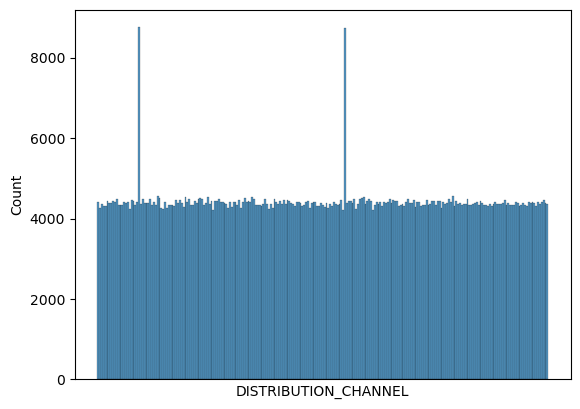

In [40]:
sns.histplot(df['DISTRIBUTION_CHANNEL'], bins = 400)
plt.xticks([])
plt.show()

Text(0.5, 1.0, 'Histogram Plotting')

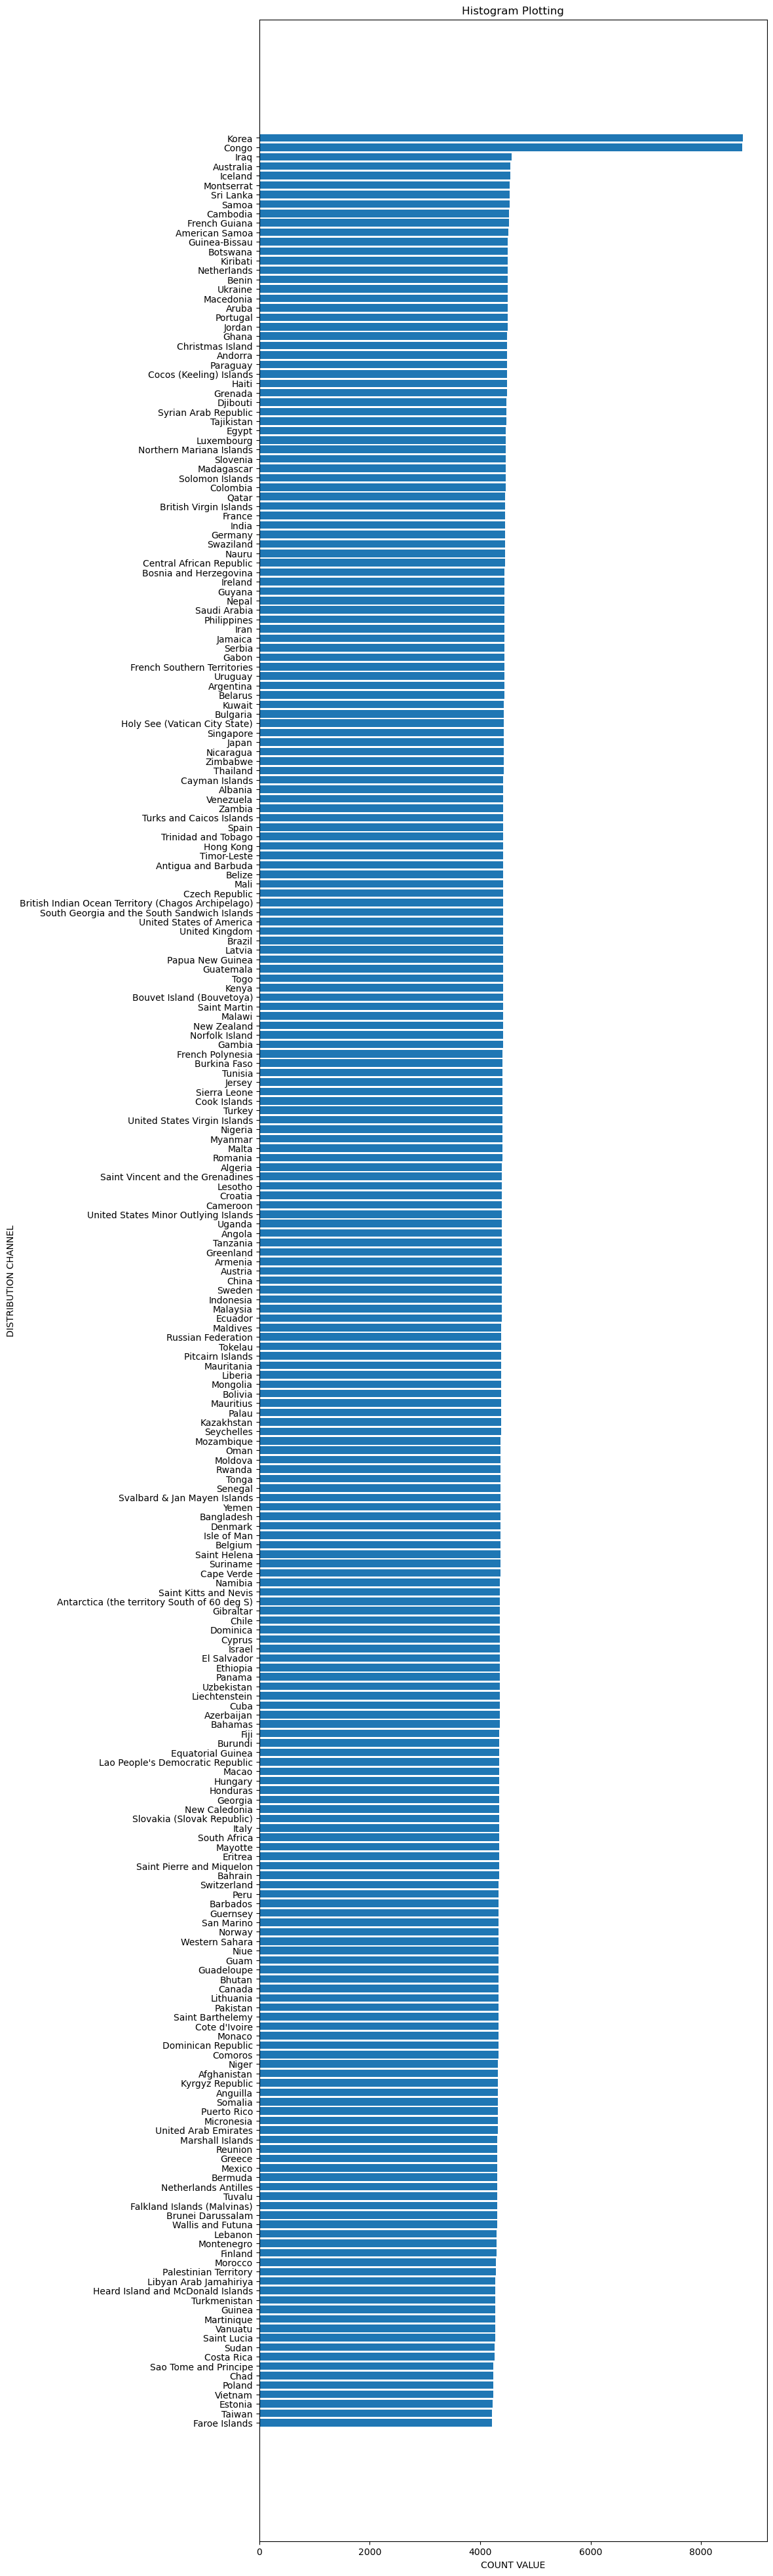

In [41]:
# Histogram is drawn for each Distribution Channel taking it according to y-axis and Count to x-axis

x047 = df['DISTRIBUTION_CHANNEL'].value_counts()
y047 = x047.sort_values()
plt.figure(figsize=(10, 50))
plt.barh(y047.index,y047.values)
plt.xlabel('COUNT VALUE')
plt.ylabel('DISTRIBUTION CHANNEL')
plt.title('Histogram Plotting')

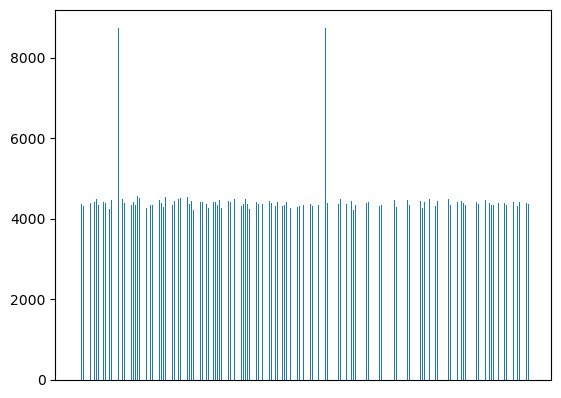

In [42]:
plt.hist(df['DISTRIBUTION_CHANNEL'], bins = 1000)
plt.xticks([])              # Removing the label marks along x- axis
plt.show()

### 2. Create a Pie Chart on ORDER_CURRENCY

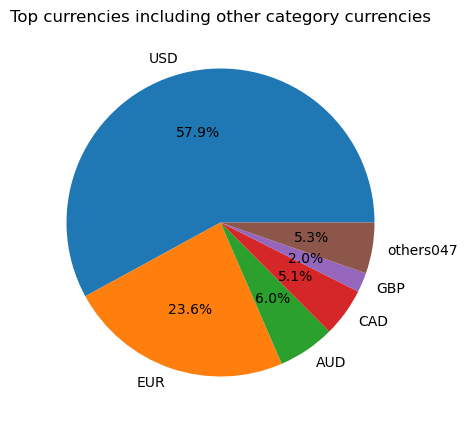

In [43]:
count047 = df['ORDER_CURRENCY'].value_counts()

# Here the top 5 category of currencies are taken in count047_top and rest are grouped as 'others047' category

count047_top = count047[:5].index
others047 = count047[5:].sum()

threshold047 = 0.05             # As top 5 currencies are taken separated

# Create labels for the top currencies and 'Others'
labels = list(count047_top) + ['others047']

sizes = list(count047[:5])+[others047]

plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('Top currencies including other category currencies')
plt.show()

### 3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

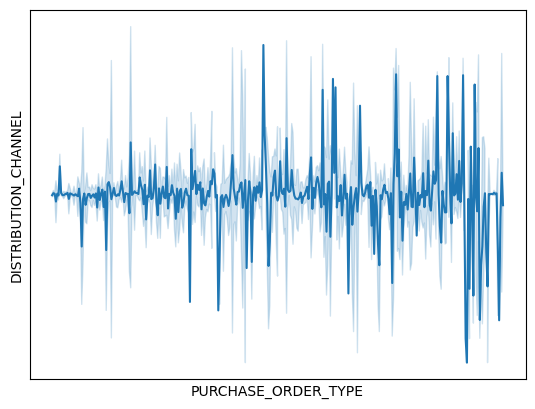

In [44]:
sns.lineplot(x = df['PURCHASE_ORDER_TYPE'], y = df['DISTRIBUTION_CHANNEL'], data = df)
plt.yticks([])
plt.xticks([])
plt.show()

### 4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd

In [45]:
df['AMOUNT_IN_USD']

0           1030.9788
1            850.3488
2          72892.9368
3           1517.9832
4              0.0000
              ...    
1101920     3267.2406
1101921        0.0000
1101922        0.0000
1101923        0.0000
1101924     3267.2406
Name: AMOUNT_IN_USD, Length: 1074783, dtype: float64

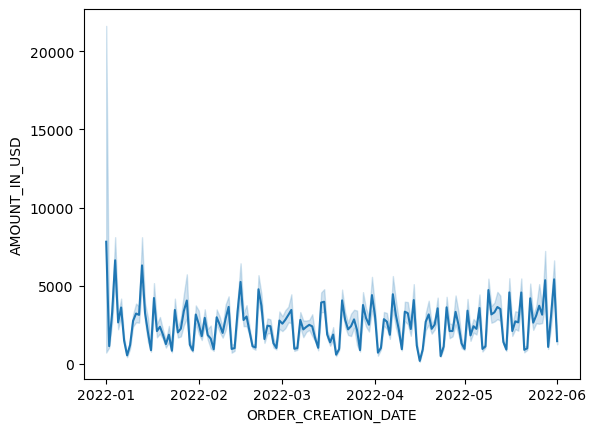

In [46]:
sns.lineplot(x=df['ORDER_CREATION_DATE'],y=df['AMOUNT_IN_USD'],data=df)
plt.show()

### 5. Create a boxplot on ORDER_AMOUNT	to find out the outliers

In [47]:
df['ORDER_AMOUNT'].dtype

dtype('O')

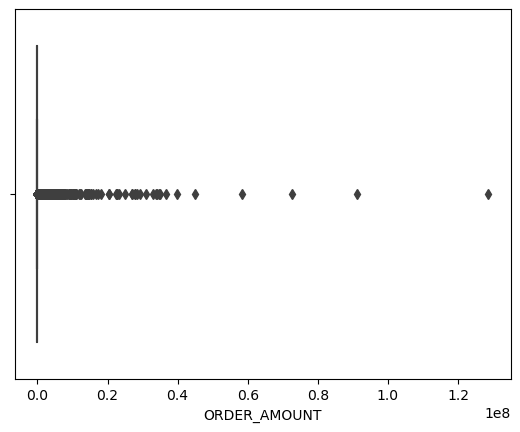

In [48]:
# As the datatype of ORDER_AMOUNT column is not numeric, so we need to convert it as numeric using to_numeric function

df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'])

sns.boxplot(x=df['ORDER_AMOUNT'],data=df)
plt.show()

### 6. Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

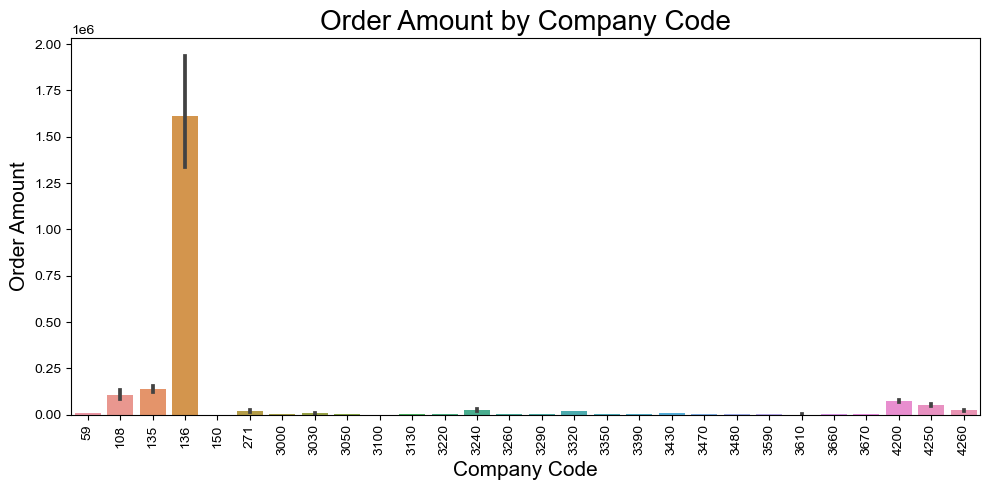

In [49]:
plt.figure(figsize=(10, 5))  # Set the figure size

sns.barplot(x='COMPANY_CODE', y='ORDER_AMOUNT', data=df)

plt.xlabel('Company Code', fontsize=15)
plt.ylabel('Order Amount', fontsize=15)
plt.title('Order Amount by Company Code', fontsize=20) 

sns.set_style('whitegrid')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.tight_layout()  # Adjust spacing between elements

plt.show()

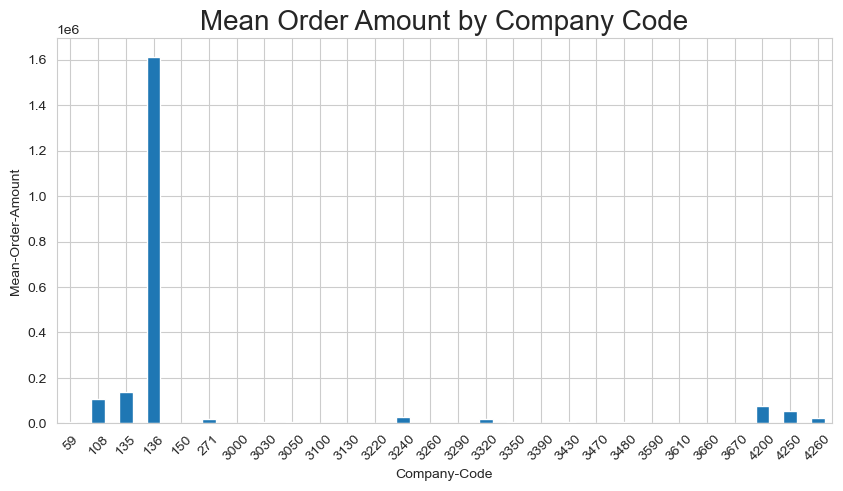

In [50]:
# Mean order amount for each company code

mean_order_amount047 = df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].mean()
plt.figure(figsize=(10, 5))
mean_order_amount047.plot(kind='bar')
plt.xlabel('Company-Code')
plt.ylabel('Mean-Order-Amount')
plt.title('Mean Order Amount by Company Code', fontsize = 20)
plt.xticks(rotation=45,fontsize = 10)
plt.grid(True)
plt.show()

# MILESTONE -3 [FEATURE ENGINEERING & SELECTION]

### 1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.
 

In [51]:
# So for detecting outliers from the specific column, we can use statistical method
# Here, Z-Score or IQR can be calculated for Outlier checking.

In [52]:
# IQR Calculation

q1 = df['AMOUNT_IN_USD'].quantile(0.25)
q3 = df['AMOUNT_IN_USD'].quantile(0.75)
IQR_047 = q3 - q1

lower_bound_047 = q1 - 1.5 * IQR_047
upper_bound_047 = q3 + 1.5 * IQR_047

outliers = df[(df['AMOUNT_IN_USD'] < lower_bound_047) | (df['AMOUNT_IN_USD'] > upper_bound_047)]

In [53]:
print(len(outliers))       #No of outliers present in dataset

101250


In [54]:
outliers.index              # Indices with correspondence to outliers

Int64Index([      2,       8,      34,      59,      68,      70,      71,
                 72,      73,      85,
            ...
            1101897, 1101906, 1101910, 1101913, 1101915, 1101916, 1101917,
            1101918, 1101920, 1101924],
           dtype='int64', length=101250)

In [55]:
# Outlier identification using Z-score

# Calculate the Z-score for each data point in the "amount_in_usd" column
mean_047 = np.mean(df['AMOUNT_IN_USD'])
std_047 = np.std(df['AMOUNT_IN_USD'])
z_scores_047 = (df['AMOUNT_IN_USD'] - mean_047) / std_047



# Find rows with Z-scores greater than a certain threshold (e.g., 3)
threshold_val = 3
outlier_count_047 = df[z_scores_047 > threshold_val]

print(len(outlier_count_047))
print()
print(outlier_count_047.index)

6086

Int64Index([     59,     133,     149,     349,     361,     439,     488,
                501,     520,     525,
            ...
            1099584, 1099585, 1101152, 1101161, 1101163, 1101182, 1101278,
            1101473, 1101598, 1101628],
           dtype='int64', length=6086)


In [56]:
# Replacing Outliers of Z-score with median value of the column

median_047 = df['AMOUNT_IN_USD'].median()
df.loc[z_scores_047 > threshold_val, 'AMOUNT_IN_USD'] = median_047

In [57]:
df['AMOUNT_IN_USD'].describe()

count    1.074783e+06
mean     1.225215e+03
std      5.099231e+03
min      0.000000e+00
25%      1.360800e+01
50%      2.610000e+02
75%      7.140306e+02
max      8.017078e+04
Name: AMOUNT_IN_USD, dtype: float64

In [58]:
df['AMOUNT_IN_USD'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1074783 entries, 0 to 1101924
Series name: AMOUNT_IN_USD
Non-Null Count    Dtype  
--------------    -----  
1074783 non-null  float64
dtypes: float64(1)
memory usage: 16.4 MB


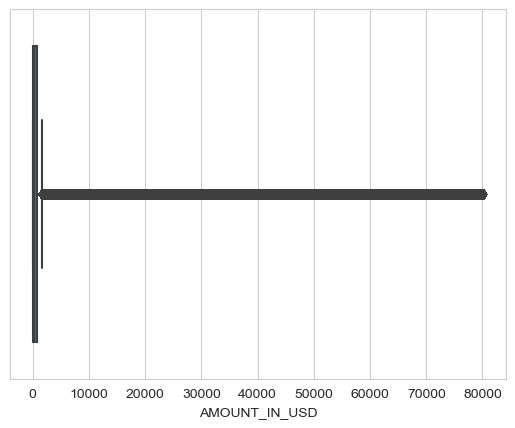

In [59]:
sns.boxplot( x = df['AMOUNT_IN_USD'])
median_047 = df['AMOUNT_IN_USD'].median()
df['AMOUNT_IN_USD'] = df['AMOUNT_IN_USD'].mask(df['AMOUNT_IN_USD'] > 2000000, median_047)

In [60]:
# We can also replace the outliers using Mean, Mode and maximum or minimum taking from the non-outlier vale

### 2. Label encoding or One hot Encoding on all the categorical columns 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1101924
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1074783 non-null  int64         
 1   SALES_ORG                1074783 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1074783 non-null  object        
 3   DIVISION                 1074783 non-null  object        
 4   RELEASED_CREDIT_VALUE    1074783 non-null  object        
 5   PURCHASE_ORDER_TYPE      1074783 non-null  object        
 6   COMPANY_CODE             1074783 non-null  int64         
 7   ORDER_CREATION_DATE      1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1074783 non-null  int64         
 9   CREDIT_CONTROL_AREA      1074783 non-null  object        
 10  SOLD_TO_PARTY            1074783 non-null  int64         
 11  ORDER_AMOUNT             1074783 non-null  float64       
 12  

In [62]:
categorical_columns_047 = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the categorical columns
print(len(categorical_columns_047))
print("Categorical columns:")
for col in categorical_columns_047:
    print(col)

8
Categorical columns:
DISTRIBUTION_CHANNEL
DIVISION
RELEASED_CREDIT_VALUE
PURCHASE_ORDER_TYPE
CREDIT_CONTROL_AREA
ORDER_CURRENCY
CREDIT_STATUS
UNIQUE_CUST_ID


In [63]:
# Select the categorical columns for label encoding

from sklearn.preprocessing import LabelEncoder

# Applying label encoding to the categorical columns

for col in categorical_columns_047:
    label_encoder047 = LabelEncoder()
    df[col] = label_encoder047.fit_transform(df[col])


In [64]:
# Unique values in each encoded columns
for col in categorical_columns_047:
    encoded_values = df[col].unique()
    print(f"Unique values in {col}: {encoded_values}")


Unique values in DISTRIBUTION_CHANNEL: [232 135 141 228  82   9  10 230 193 224 113  64 138  24  29  83 185  42
 213  94  97 109 114 234  92 131 121 120  58  16  40 154 102   3 122 173
  21  89  35  52 162 177  72 172 161   2  71  98 215  22  78 159 150 226
  80  90 152 210  25 145  81  41  69 196  91 110  56 132  37 149 205  77
 146   8 168 124  47 235 155  73 242  99 108 204 227 170  86  48 157 183
 169  20 237  57  93  84  34  17  33  55  31 163 128 107 143 111  32 118
  30  61 238  14 236 233 223  53 221 202 119 116 178 201 166  13  51 192
 153  50 147 142 206 198 212  49 137 115  76 136  45 190 207   4  36 188
 180  79 127 191  66 186  96   7  87 140 217 214 216  46 130 211  75  19
  68  88  54   0 160  11 231   5  62 144 156 220 134  15 197 125 106 240
 103 171 189 151 101 184 112  63 187 174  74  12 200  26 182 158 117 123
  67  27 181  70 105 133 195  18 208 100  38 164   6 194 175  43  28 167
 219  39 209 176 239 179  65 126  95 203  44 139  60 222  85 225 129 218
 241 148  23

In [65]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,756141537,954.61,2022-01-13,6,3,12311807,1030.9788,6608
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,798847812,787.36,2022-01-11,6,3,12311807,850.3488,6608
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,960984659,67493.46,2022-01-12,6,2,12118758,72892.9368,4405
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,925857642,1405.54,2022-01-06,6,2,1210499770,1517.9832,4059
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,947942786,0.00,2022-01-06,6,1,1210351400,0.0000,2919


In [66]:
from pandas.api.types import CategoricalDtype
for column in categorical_columns_047:
    df[column] = df[column].astype(CategoricalDtype())

# Perform one-hot encoding on the categorical columns using SparseDataFrame
one_hot_encoded_df_047 = pd.get_dummies(df, columns=categorical_columns_047, sparse=True)

In [67]:
one_hot_encoded_df_047

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,CUSTOMER_NUMBER,AMOUNT_IN_USD,...,UNIQUE_CUST_ID_6689,UNIQUE_CUST_ID_6690,UNIQUE_CUST_ID_6691,UNIQUE_CUST_ID_6692,UNIQUE_CUST_ID_6693,UNIQUE_CUST_ID_6694,UNIQUE_CUST_ID_6695,UNIQUE_CUST_ID_6696,UNIQUE_CUST_ID_6697,UNIQUE_CUST_ID_6698
0,946851639,3537,3220,2022-01-01,43012,756141537,954.61,2022-01-13,12311807,1030.9788,...,0,0,0,0,0,0,0,0,0,0
1,963432061,3449,3220,2022-01-01,43114,798847812,787.36,2022-01-11,12311807,850.3488,...,0,0,0,0,0,0,0,0,0,0
2,971991639,3238,3260,2022-01-01,110019,960984659,67493.46,2022-01-12,12118758,72892.9368,...,0,0,0,0,0,0,0,0,0,0
3,754349803,3911,3290,2022-01-01,153013,925857642,1405.54,2022-01-06,1210499770,1517.9832,...,0,0,0,0,0,0,0,0,0,0
4,930253442,2381,3290,2022-01-01,160020,947942786,0.00,2022-01-06,1210351400,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,4260,2022-06-01,74357,946056501,4415.19,2022-06-01,1210331804,3267.2406,...,0,0,0,0,0,0,0,0,0,0
1101921,998890898,4509,4260,2022-06-01,84052,894775488,0.00,2022-06-01,1210331804,0.0000,...,0,0,0,0,0,0,0,0,0,0
1101922,983330221,3951,4260,2022-06-01,85322,909729781,0.00,2022-06-01,1210331811,0.0000,...,0,0,0,0,0,0,0,0,0,0
1101923,926668029,3235,4260,2022-06-01,90538,940836817,0.00,2022-06-01,1210331811,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df.shape

(1074783, 18)

### 3. Log Transformations on continuous columns 

In [69]:
# select_dtypes used for selecting only continuous values present in it
# Continuous values means numeric values like int64, float64

continuous_cols_047 = df.select_dtypes(include=['int64', 'float64']).columns

In [70]:
# Continuous columns present in our dataset
print(len(continuous_cols_047))
for i in continuous_cols_047:
    print(i)

8
CUSTOMER_ORDER_ID
SALES_ORG
COMPANY_CODE
ORDER_CREATION_TIME
SOLD_TO_PARTY
ORDER_AMOUNT
CUSTOMER_NUMBER
AMOUNT_IN_USD


In [71]:
# Apply log transformation to each continuous column

for col in continuous_cols_047:
    df[col] = np.log1p(df[col])

In [72]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,20.668653,8.171317,232,1,1,0,8.077447,2022-01-01,10.669258,5,20.443739,6.862350,2022-01-13,6,3,16.326069,6.939233,6608
1,20.686013,8.146130,135,1,1,0,8.077447,2022-01-01,10.671626,2,20.498681,6.669955,2022-01-11,6,3,16.326069,6.746822,6608
2,20.694858,8.083020,141,1,43496,204,8.089789,2022-01-01,11.608417,0,20.683469,11.119801,2022-01-12,6,2,16.310265,11.196761,4405
3,20.441367,8.271804,228,1,7852,255,8.098947,2022-01-01,11.938285,5,20.646231,7.248888,2022-01-06,6,2,20.914299,7.325796,4059
4,20.650968,7.775696,82,1,1,255,8.098947,2022-01-01,11.983060,4,20.669805,0.000000,2022-01-06,6,1,20.914177,0.000000,2919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,20.564980,7.823646,79,1,1,342,8.357259,2022-06-01,11.216647,1,20.667813,8.393033,2022-06-01,18,3,20.914160,8.092007,2782
1101921,20.722156,8.414052,10,1,1,342,8.357259,2022-06-01,11.339203,3,20.612083,0.000000,2022-06-01,18,3,20.914160,0.000000,2782
1101922,20.706456,8.281977,151,1,1,342,8.357259,2022-06-01,11.354199,0,20.628658,0.000000,2022-06-01,18,3,20.914160,0.000000,2784
1101923,20.647106,8.082093,167,1,1,342,8.357259,2022-06-01,11.413536,7,20.662280,0.000000,2022-06-01,18,3,20.914160,0.000000,2784


### 4. Try to extract new features by grouping existing columns 

In [73]:
df['total_order_amount'] = df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].transform('sum')

In [74]:
df['total_order_amount']

0          367131.217302
1          367131.217302
2           80193.039645
3          107583.612158
4          107583.612158
               ...      
1101920     34972.349714
1101921     34972.349714
1101922     34972.349714
1101923     34972.349714
1101924     34972.349714
Name: total_order_amount, Length: 1074783, dtype: float64

### 5.  Create a heatmap to find correlation between the columns

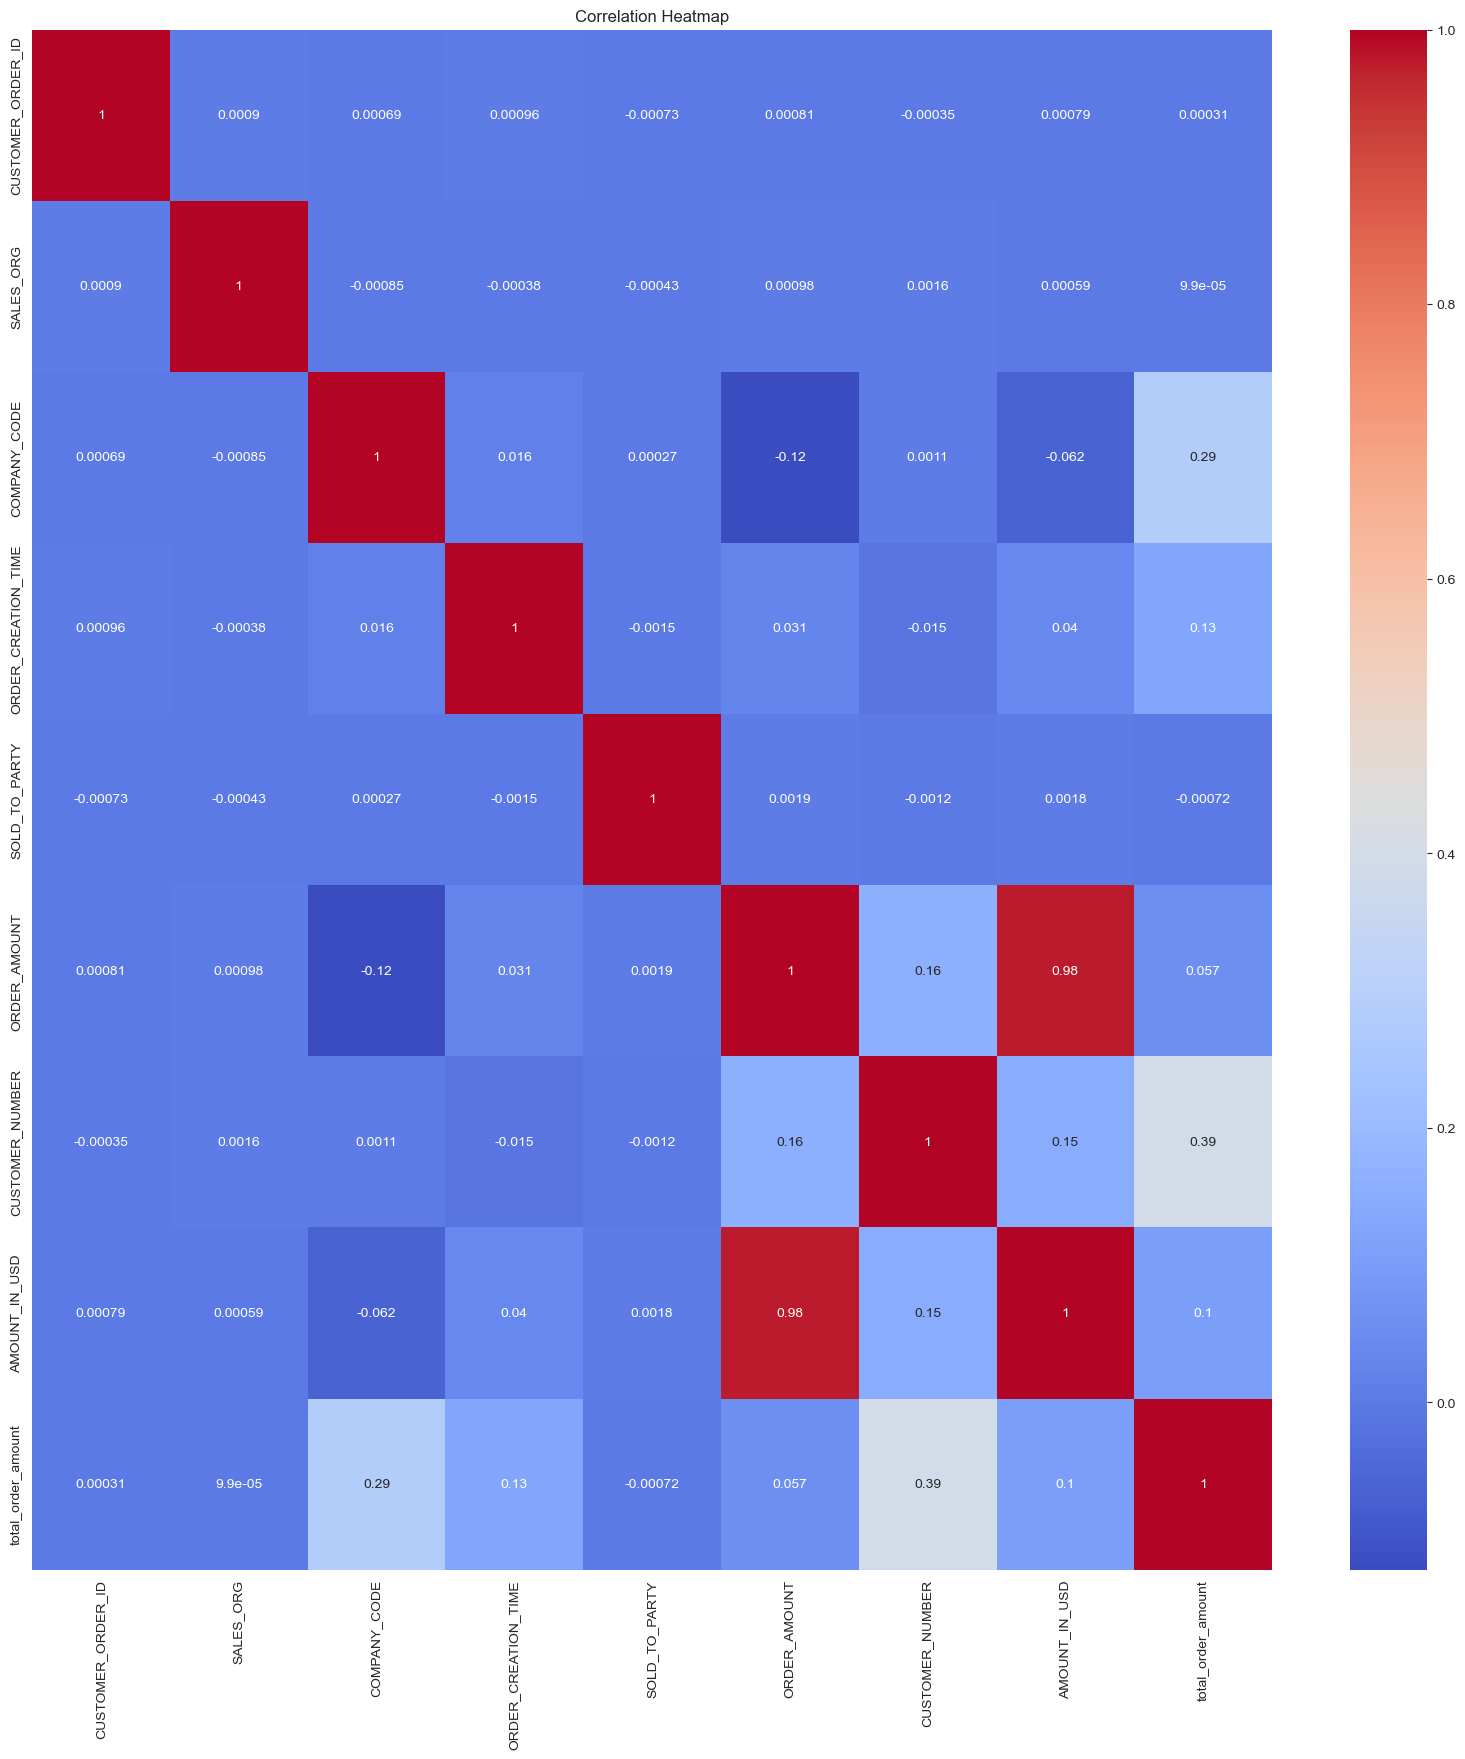

In [75]:
plt.figure(figsize=(20,20))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 ### 6. Try to identify important or relevant columns for feature extraction

In [76]:
# So by calculating the correlation matrix we can extract highly correlated features

# It creates a list of tuples (high_corr_var047) where each tuple represents a pair of highly correlated columns.

corr_matrix047 = df.corr().abs()

high_corr_var047 = np.where(corr_matrix047 > 0.7)

high_corr_var047 = [(corr_matrix047.columns[x], corr_matrix047.columns[y]) for x, y in zip(*high_corr_var047) if x != y and x < y]

print(high_corr_var047)

[('ORDER_AMOUNT', 'AMOUNT_IN_USD')]


In [77]:
print(corr_matrix047.shape)

(9, 9)


In [78]:
# It's not recommended to take the highly correlated features as the most relevant features
# As if we take them then during training model may be overfitted.
# So we will try to check all the columns and estimate the required columns for this regression task.

In [79]:
import pandas as pd

# Calculate the correlation matrix
corr_matrix047 = df.corr().abs()

# Set the correlation threshold
threshold_val = 0.5

# Create a list to store the relevant columns
relevant_cols047 = []

# Iterate over the columns
for col in corr_matrix047.columns:
    if col != 'AMOUNT_IN_USD':            # Exclude the target variable
        if any(corr_matrix047[col] >= threshold_val):  # Check if any correlation is above the threshold
            relevant_cols047.append(col)

# Include the highly correlated features as well
# relevant_cols047.extend(['ORDER_AMOUNT'])

# Create a new DataFrame with only the relevant columns
extracted_features047 = df[relevant_cols047]

# Print the relevant columns
print('Relevant columns for feature extraction:', relevant_cols047)


Relevant columns for feature extraction: ['CUSTOMER_ORDER_ID', 'SALES_ORG', 'COMPANY_CODE', 'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'CUSTOMER_NUMBER', 'total_order_amount']


In [80]:
# We have to convert the 'Timestamp' column to numerical representation

In [81]:
# Convert 'REQUESTED_DELIVERY_DATE' column to numerical values
df['REQUESTED_DELIVERY_DATE'] = pd.to_numeric(df['REQUESTED_DELIVERY_DATE'], errors='coerce')

# Convert 'ORDER_CREATION_DATE' column to numerical values
df['ORDER_CREATION_DATE'] = pd.to_numeric(df['ORDER_CREATION_DATE'], errors='coerce')

In [82]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID,total_order_amount
0,20.668653,8.171317,232,1,1,0,8.077447,1640995200000000000,10.669258,5,20.443739,6.862350,1642032000000000000,6,3,16.326069,6.939233,6608,367131.217302
1,20.686013,8.146130,135,1,1,0,8.077447,1640995200000000000,10.671626,2,20.498681,6.669955,1641859200000000000,6,3,16.326069,6.746822,6608,367131.217302
2,20.694858,8.083020,141,1,43496,204,8.089789,1640995200000000000,11.608417,0,20.683469,11.119801,1641945600000000000,6,2,16.310265,11.196761,4405,80193.039645
3,20.441367,8.271804,228,1,7852,255,8.098947,1640995200000000000,11.938285,5,20.646231,7.248888,1641427200000000000,6,2,20.914299,7.325796,4059,107583.612158
4,20.650968,7.775696,82,1,1,255,8.098947,1640995200000000000,11.983060,4,20.669805,0.000000,1641427200000000000,6,1,20.914177,0.000000,2919,107583.612158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,20.564980,7.823646,79,1,1,342,8.357259,1654041600000000000,11.216647,1,20.667813,8.393033,1654041600000000000,18,3,20.914160,8.092007,2782,34972.349714
1101921,20.722156,8.414052,10,1,1,342,8.357259,1654041600000000000,11.339203,3,20.612083,0.000000,1654041600000000000,18,3,20.914160,0.000000,2782,34972.349714
1101922,20.706456,8.281977,151,1,1,342,8.357259,1654041600000000000,11.354199,0,20.628658,0.000000,1654041600000000000,18,3,20.914160,0.000000,2784,34972.349714
1101923,20.647106,8.082093,167,1,1,342,8.357259,1654041600000000000,11.413536,7,20.662280,0.000000,1654041600000000000,18,3,20.914160,0.000000,2784,34972.349714


In [83]:
# Split the dataset into X (input features) and y (target variable)

x = df.drop('AMOUNT_IN_USD', axis=1)
y = df['AMOUNT_IN_USD']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(f_regression)
selector.fit(x_train, y_train)

# Get the selected features
selected_features047 = x_train.columns[selector.get_support()]

# Create an instance of the linear regression model
model = LinearRegression()

# Define the parameter grid for grid search
param_grid = {
    'fit_intercept': [True, False]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train[selected_features047], y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(x_test[selected_features047])

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Features:", selected_features047)
print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Best Features: Index(['DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE',
       'COMPANY_CODE', 'ORDER_CREATION_TIME', 'ORDER_AMOUNT', 'ORDER_CURRENCY',
       'CREDIT_STATUS', 'CUSTOMER_NUMBER', 'total_order_amount'],
      dtype='object')
Best Parameters: {'fit_intercept': True}
Mean Squared Error: 0.3118298006685517
Root Mean Squared Error: 0.558417228126561
Mean Absolute Error: 0.23566797298096293
R2 Score: 0.9609444355571939


So here from GridSearchCV and using SelectKBest, we got the best features among the whole dataset.

Now we will check each selected feature importance in this prediction task like how they are matured to be fit 
with the target variable Based on that we will take them accordingly for model training

In [84]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

selected_features047 = ['DIVISION', 'RELEASED_CREDIT_VALUE', 'COMPANY_CODE',
       'ORDER_CREATION_TIME', 'REQUESTED_DELIVERY_DATE', 'CREDIT_STATUS',
       'CUSTOMER_NUMBER', 'AMOUNT_IN_USD', 'UNIQUE_CUST_ID',
       'total_order_amount']

df_selected = df[selected_features047].copy()

# Convert categorical columns to "category" dtype
categorical_columns = ['DIVISION', 'RELEASED_CREDIT_VALUE', 'CREDIT_STATUS', 'UNIQUE_CUST_ID']
for col in categorical_columns:
    df_selected[col] = df_selected[col].astype('category')

# Apply label encoding to the categorical columns
label_encoder = LabelEncoder()
for col in df_selected.columns:
    if df_selected[col].dtype.name == 'category':
        df_selected[col] = label_encoder.fit_transform(df_selected[col])

x = df_selected.drop('AMOUNT_IN_USD',axis=1)
y = df_selected['AMOUNT_IN_USD']

# XGBoost Model
model = xgb.XGBRegressor()
model.fit(x, y)

# Feature importance
importance = model.feature_importances_

# Get the names of the features
feature_names = x.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                   Feature  Importance
0                 DIVISION    0.307417
8       total_order_amount    0.170724
5            CREDIT_STATUS    0.121894
1    RELEASED_CREDIT_VALUE    0.090676
7           UNIQUE_CUST_ID    0.089152
6          CUSTOMER_NUMBER    0.065589
2             COMPANY_CODE    0.055264
4  REQUESTED_DELIVERY_DATE    0.051235
3      ORDER_CREATION_TIME    0.048049


In [85]:
print(feature_names)

Index(['DIVISION', 'RELEASED_CREDIT_VALUE', 'COMPANY_CODE',
       'ORDER_CREATION_TIME', 'REQUESTED_DELIVERY_DATE', 'CREDIT_STATUS',
       'CUSTOMER_NUMBER', 'UNIQUE_CUST_ID', 'total_order_amount'],
      dtype='object')


In [86]:
print(selected_features047)

['DIVISION', 'RELEASED_CREDIT_VALUE', 'COMPANY_CODE', 'ORDER_CREATION_TIME', 'REQUESTED_DELIVERY_DATE', 'CREDIT_STATUS', 'CUSTOMER_NUMBER', 'AMOUNT_IN_USD', 'UNIQUE_CUST_ID', 'total_order_amount']


# MILESTONE - 4 [MODEL TRAINING & EVALUATIONS]

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### 1-2-3. Try different machine learning models Linear Regression, Support Vector Machine, Decision Tree, 

### Random Forest, AdaBoost and lightGBM etc. as well as Calculate the Error Metrics like MSE, RMSE, MAE,

### and R2 Score for checking best model.

IN THIS QUESTION, BASICALLY I CHECKED FOR NORMAL TRAIN TEST SPLITTING DATA AND THEN IN NEXT PHASE I SPLITTED THE DATASET USING TIME BASED ANALYSIS. 

BELOW, 6 MODELS ARE PERFORMED FOR NORMAL TRAIN TEST SPLIT DATA.

## NORMAL TRAIN TEST SPLIT

In [88]:
# All Dependencies imported at the first of this .ipnyb

In [89]:
# Splitting the data into relevant features(x) and target variable(y)

x = df[feature_names]
y = df['AMOUNT_IN_USD']

In [90]:
# Splitting the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 45)

## Linear Regression

In [91]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_test)        # Prediction on test data


# Calculation of Error metrics
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print("Mean Square Error: ", mse_linear)
print("Root Means Square Error: ", rmse_linear)
print("Mean Absolute Error: ", mae_linear)
print("R2 Score: ", r2_linear)

Mean Square Error:  7.596969645792412
Root Means Square Error:  2.756260083118502
Mean Absolute Error:  2.251946232024614
R2 Score:  0.04872669239148886


In [92]:
train_pred_lr = model_lr.predict(x_train)
r2_linear_train = r2_score(y_train, train_pred_lr)
print(r2_linear_train)
print(r2_linear)

0.05816417974578303
0.04872669239148886


## SVM

In [93]:
# As all the columns present in x variable have linear relationship So we can use LinearSVR in this case
from sklearn.svm import LinearSVR

model_svm = LinearSVR()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)

# Error metrics
mse_svm = mean_squared_error(y_test, y_pred)
rmse_svm = np.sqrt(mse)
mae_svm = mean_absolute_error(y_test, y_pred)
r2_svm = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_svm)
print("Root Mean Sqaured Error: ", rmse_svm)
print("Mean Absolute Error: ", mae_svm)
print("R2 score: ", r2_svm)

Mean Squared Error:  29.466621030530437
Root Mean Sqaured Error:  0.558417228126561
Mean Absolute Error:  4.6347076331999295
R2 score:  -2.689735691820763


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [94]:
train_pred_svm = model_svm.predict(x_train)
r2_svm_train = r2_score(y_train, train_pred_svm)
print(r2_svm_train)
print(r2_svm)

-2.697086814130243
-2.689735691820763


## Decision Tree Regression

In [95]:
# Create an instance of the Decision Tree Regression model
model_dt = DecisionTreeRegressor()

# Train the model on the training data
model_dt.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model_dt.predict(x_test)

# Evaluate the model's performance
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)


print("Mean Squared Error: ", mse_dt)
print("Root Means Square error: ", rmse_dt)
print("Mean Absolute error: ", mae_dt)
print("r2 score: ", r2_dt)

Mean Squared Error:  2.6089869689691447
Root Means Square error:  1.6152358864788587
Mean Absolute error:  0.8874706433969508
r2 score:  0.6733092562962442


In [96]:
train_pred_dt = model_dt.predict(x_train)
r2_dt_train = r2_score(y_train, train_pred_dt)
print(r2_dt_train)
print(r2_dt)

0.9447359875666728
0.6733092562962442


## Random Forest Regression

In [97]:
# # Create an instance of the Random Forest Regression model
model_rfc = RandomForestRegressor()

# Train the model on the training data
model_rfc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model_rfc.predict(x_test)

# Evaluate the model's performance
mse_rfc = mean_squared_error(y_test, y_pred)
rmse_rfc = np.sqrt(mse_rfc)
mae_rfc = mean_absolute_error(y_test, y_pred)
r2_rfc = r2_score(y_test, y_pred)


print("Mean Squared Error: ", mse_rfc)
print("Root Means Square error: ", rmse_rfc)
print("Mean Absolute error: ", mae_rfc)
print("r2 score: ", r2_rfc)

Mean Squared Error:  1.9230466818174103
Root Means Square error:  1.3867395868790255
Mean Absolute error:  0.8001208474780986
r2 score:  0.759200962621826


In [98]:
train_pred_rfc = model_rfc.predict(x_train)
r2_rfc_train = r2_score(y_train, train_pred_rfc)
print(r2_rfc_train)
print(r2_rfc)

0.9243298106655135
0.759200962621826


## AdaBoost 

In [99]:

model_ab = AdaBoostRegressor()

# Train the model on the training data
model_ab.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model_ab.predict(x_test)


# Evaluate the model's performance
mse_ab = mean_squared_error(y_test, y_pred)
rmse_ab = np.sqrt(mse_ab)
mae_ab = mean_absolute_error(y_test, y_pred)
r2_ab = r2_score(y_test, y_pred)


print("Mean Squared Error: ", mse_ab)
print("Root Means Square error: ", rmse_ab)
print("Mean Absolute error: ", mae_ab)
print("r2 score: ", r2_ab)

Mean Squared Error:  6.560119778457941
Root Means Square error:  2.5612730776818666
Mean Absolute error:  2.1031820982779625
r2 score:  0.1785584080333944


In [100]:
train_pred_ab = model_ab.predict(x_train)
r2_ab_train = r2_score(y_train, train_pred_ab)
print(r2_ab_train)
print(r2_ab)

0.17841485853015815
0.1785584080333944


## LightGBM Method

In [101]:
!pip install lightgbm

In [102]:
import lightgbm as lgb
import math

# Create and train the LightGBM regressor model
model_lgbm = lgb.LGBMRegressor()
model_lgbm.fit(x_train, y_train)

y_pred = model_lgbm.predict(x_test)

# Evaluation metrics
mse_lgbm = mean_squared_error(y_test, y_pred)
rmse_lgbm = np.sqrt(mse_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred)
r2_lgbm = r2_score(y_test, y_pred)

print("MSE:", mse_lgbm)
print("RMSE:", rmse_lgbm)
print("MAE:", mae_lgbm)
print("R2 score:", r2_lgbm)

MSE: 2.565912392263618
RMSE: 1.6018465570283622
MAE: 1.0811287880942089
R2 score: 0.6787029457496694


In [103]:
train_pred_lgbm = model_lgbm.predict(x_train)
r2_lgbm_train = r2_score(y_train, train_pred_lgbm)
print(r2_lgbm_train)
print(r2_lgbm)

0.6839296007841718
0.6787029457496694


## TIME BASED TRAIN TEST SPLIT

Now here we will try to optimize or train_test_split by using time series data analysis. Because our dataset is time based
So we have to predict future unknown data on according to the past data.

In [104]:
df_sorted = df.sort_values('ORDER_CREATION_TIME')

# Define the train-test split ratio
train_size = 0.8  # 80% of the data for training, 20% for testing

# Calculate the index to split the data
split_index = int(train_size * len(df_sorted))

# Split the data into training and testing sets
train_data = df_sorted[:split_index]
test_data = df_sorted[split_index:]

# Separate the features and target variables
x_train_time = train_data.drop(['AMOUNT_IN_USD'], axis=1)
y_train_time = train_data['AMOUNT_IN_USD']

x_test_time = test_data.drop(['AMOUNT_IN_USD'], axis=1)
y_test_time = test_data['AMOUNT_IN_USD']


In [105]:
# Testing only for LinearRegression

model_time_lr = LinearRegression()
model_time_lr.fit(x_train_time, y_train_time)

# Make predictions on the test set
y_pred_time = model_time_lr.predict(x_test_time)

# Calculate the evaluation metrics
mse_time_lr = mean_squared_error(y_test_time, y_pred_time)
rmse_time_lr = mean_squared_error(y_test_time, y_pred_time, squared=False)
mae_time_lr = mean_absolute_error(y_test_time, y_pred_time)
r2_time_lr = r2_score(y_test_time, y_pred_time)

# Print the evaluation metrics
print("MSE:", mse_time_lr)
print("RMSE:", rmse_time_lr)
print("MAE:", mae_time_lr)
print("R2 score:", r2_time_lr)

MSE: 0.221365556993468
RMSE: 0.470495012719017
MAE: 0.2248728252208013
R2 score: 0.9701739332576491


In [106]:
train_pred = model_time_lr.predict(x_train_time)

r2_train = r2_score(y_train_time, train_pred)

print(r2_train)
print(r2_time_lr)

0.9559416337552149
0.9701739332576491


As the r2_train and r2_test value are coming closer to each other And difference is very less, 
testing score is slighlt higher than training ,So model is performing well in liner regression.

In [107]:
# Testing only for svm

model_time_svm = LinearSVR()
model_time_svm.fit(x_train_time, y_train_time)

# Make predictions on the test set
y_pred_time = model_time_svm.predict(x_test_time)

# Calculate the evaluation metrics
mse_time_svm = mean_squared_error(y_test_time, y_pred_time)
rmse_time_svm = mean_squared_error(y_test_time, y_pred_time, squared=False)
mae_time_svm = mean_absolute_error(y_test_time, y_pred_time)
r2_time_svm = r2_score(y_test_time, y_pred_time)

# Print the evaluation metrics
print("MSE:", mse_time_svm)
print("RMSE:", rmse_time_svm)
print("MAE:", mae_time_svm)
print("R2 score:", r2_time_svm)

MSE: 28.32586372594996
RMSE: 5.322204780535033
MAE: 4.5720872061447375
R2 score: -2.8165336717213343


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [108]:
train_pred = model_time_svm.predict(x_train_time)

r2_train = r2_score(y_train_time, train_pred)

print(r2_train)
print(r2_time_svm)

-2.668714382520475
-2.8165336717213343


In case of SVM, training and testing accuracy of model is very poor. So model is not properly fitted and performing worse
in this scenario.

In [109]:
# Testing only for Decision tree

model_time_dt = DecisionTreeRegressor()
model_time_dt.fit(x_train_time, y_train_time)

# Make predictions on the test set
y_pred_time = model_time_dt.predict(x_test_time)

# Calculate the evaluation metrics
mse_time_dt = mean_squared_error(y_test_time, y_pred_time)
rmse_time_dt = mean_squared_error(y_test_time, y_pred_time, squared=False)
mae_time_dt = mean_absolute_error(y_test_time, y_pred_time)
r2_time_dt = r2_score(y_test_time, y_pred_time)

# Print the evaluation metrics
print("MSE:", mse_time_dt)
print("RMSE:", rmse_time_dt)
print("MAE:", mae_time_dt)
print("R2 score:", r2_time_dt)

MSE: 0.001961133741027821
RMSE: 0.04428468969099615
MAE: 0.0010056815743453161
R2 score: 0.9997357632928763


In [110]:
train_pred = model_time_dt.predict(x_train_time)

r2_train = r2_score(y_train_time, train_pred)

print(r2_train)
print(r2_time_dt)

0.9999999999999998
0.9997357632928763


Decision trees have the capability to learn intricate patterns and details from the training data, which can lead to high accuracy scores. I also checked for cross validation set performance in decision tree, and ensured model is not overfitted.

In [111]:
# Testing only for Random Forest

model_time_rfc = RandomForestRegressor()
model_time_rfc.fit(x_train_time, y_train_time)

# Make predictions on the test set
y_pred_time = model_time_rfc.predict(x_test_time)

# Calculate the evaluation metrics
mse_time_rfc = mean_squared_error(y_test_time, y_pred_time)
rmse_time_rfc = mean_squared_error(y_test_time, y_pred_time, squared=False)
mae_time_rfc = mean_absolute_error(y_test_time, y_pred_time)
r2_time_rfc = r2_score(y_test_time, y_pred_time)

# Print the evaluation metrics
print("MSE:", mse_time_rfc)
print("RMSE:", rmse_time_rfc)
print("MAE:", mae_time_rfc)
print("R2 score:", r2_time_rfc)

MSE: 0.0009991046518026216
RMSE: 0.03160861673345769
MAE: 0.0021972979188614856
R2 score: 0.9998653839267861


In [112]:
# Random Forest Accuracy checking in time based

train_pred = model_time_rfc.predict(x_train_time)

r2_train = r2_score(y_train_time, train_pred)

print(r2_train)
print(r2_time_rfc)

0.9999701405696346
0.9998653839267861


In [113]:
# Testing only for AdaBoost Model in time based

model_time_ab = AdaBoostRegressor()
model_time_ab.fit(x_train_time, y_train_time)

# Make predictions on the test set
y_pred_time = model_time_ab.predict(x_test_time)

# Calculate the evaluation metrics
mse_time_ab = mean_squared_error(y_test_time, y_pred_time)
rmse_time_ab = mean_squared_error(y_test_time, y_pred_time, squared=False)
mae_time_ab = mean_absolute_error(y_test_time, y_pred_time)
r2_time_ab = r2_score(y_test_time, y_pred_time)

# Print the evaluation metrics
print("MSE:", mse_time_ab)
print("RMSE:", rmse_time_ab)
print("MAE:", mae_time_ab)
print("R2 score:", r2_time_ab)

MSE: 0.22208422627642962
RMSE: 0.4712581312576258
MAE: 0.29949013477743636
R2 score: 0.9700771021232558


In [114]:
train_pred = model_time_ab.predict(x_train_time)

r2_train = r2_score(y_train_time, train_pred)

print(r2_train)
print(r2_time_ab)

0.9642171369729288
0.9700771021232558


In [115]:
# Testing only for lightGBM model

import lightgbm as lgb
import math

model_time_l = lgb.LGBMRegressor()
model_time_l.fit(x_train_time, y_train_time)

# Make predictions on the test set
y_pred_time = model_time_l.predict(x_test_time)

# Calculate the evaluation metrics
mse_time_l = mean_squared_error(y_test_time, y_pred_time)
rmse_time_l = mean_squared_error(y_test_time, y_pred_time, squared=False)
mae_time_l = mean_absolute_error(y_test_time, y_pred_time)
r2_time_l = r2_score(y_test_time, y_pred_time)

# Print the evaluation metrics
print("MSE:", mse_time_l)
print("RMSE:", rmse_time_l)
print("MAE:", mae_time_l)
print("R2 score:", r2_time_l)


MSE: 0.009826615919778308
RMSE: 0.09912928890987924
MAE: 0.01586414632506444
R2 score: 0.9986759941056078


In [116]:
train_pred = model_time_l.predict(x_train_time)

r2_train = r2_score(y_train_time, train_pred)

print(r2_train)
print(r2_time_l)

0.9990601673411479
0.9986759941056078


### 4. Comparisional Analysis from visualisation of different Models for Model accuracy checking

Visualizations of different models error metrics for better insight gain in case of normal train test split

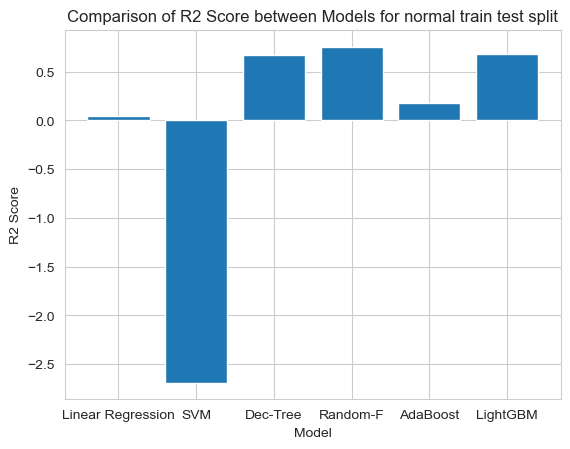

In [117]:
# Comparison of R2 score of diff models

import matplotlib.pyplot as plt

# Define the error metrics for each model
r2_values = [r2_linear, r2_svm, r2_dt, r2_rfc, r2_ab, r2_lgbm]

# Define the model names
model_names = ['Linear Regression', 'SVM', 'Dec-Tree', 'Random-F', 'AdaBoost', 'LightGBM']

# Create a bar plot
plt.bar(model_names, r2_values)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Score between Models for normal train test split')
plt.show()

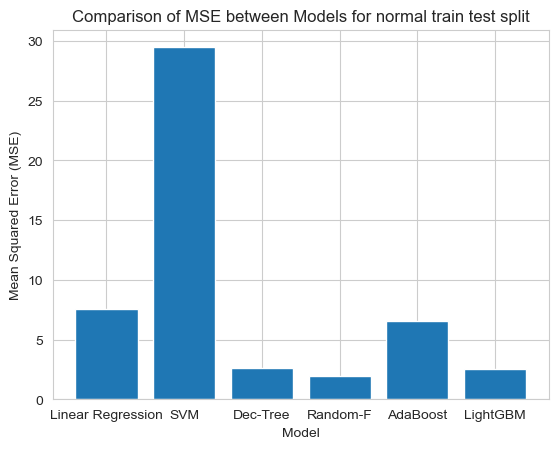

In [118]:
# Comparison of MSE of diff models
import matplotlib.pyplot as plt

# Define the error metrics for each model
mse_values = [mse_linear, mse_svm, mse_dt, mse_rfc, mse_ab, mse_lgbm]

# Define the model names
model_names = ['Linear Regression', 'SVM', 'Dec-Tree', 'Random-F', 'AdaBoost', 'LightGBM']

# Create a bar plot
plt.bar(model_names, mse_values)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE between Models for normal train test split')
plt.show()

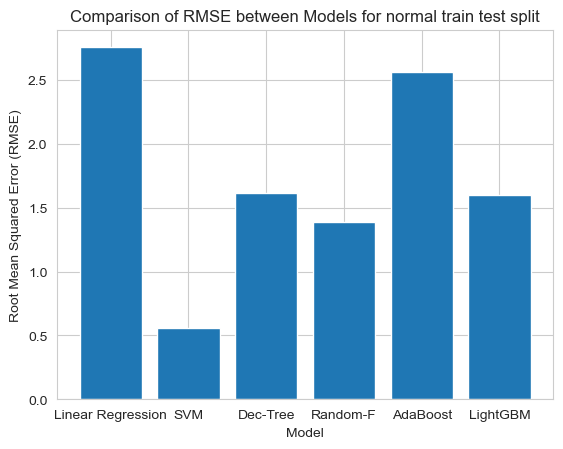

In [119]:
# Comparison of RMSE of diff models
import matplotlib.pyplot as plt

# Define the error metrics for each model
rmse_values = [rmse_linear, rmse_svm, rmse_dt, rmse_rfc, rmse_ab, rmse_lgbm]

# Define the model names
model_names = ['Linear Regression', 'SVM', 'Dec-Tree', 'Random-F', 'AdaBoost', 'LightGBM']

# Create a bar plot
plt.bar(model_names, rmse_values)
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE between Models for normal train test split')
plt.show()

Visualizations of different models error metrics for better insight gain in case of Time based train test split

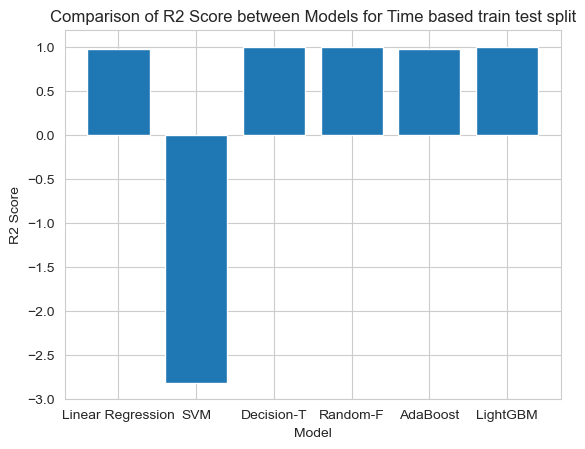

In [120]:
# Comparison of R2 score of diff models

import matplotlib.pyplot as plt

# Define the error metrics for each model
r2_values = [r2_time_lr, r2_time_svm, r2_time_dt, r2_time_rfc, r2_time_ab, r2_time_l]

# Define the model names
model_names = ['Linear Regression', 'SVM', 'Decision-T', 'Random-F', 'AdaBoost', 'LightGBM']

# Create a bar plot
plt.bar(model_names, r2_values)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Score between Models for Time based train test split')
plt.show()

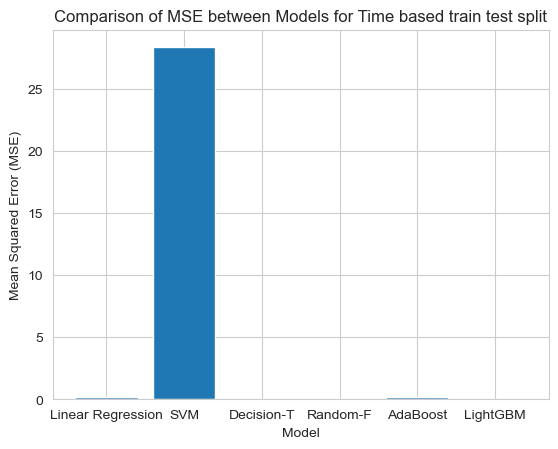

In [121]:
# Comparison of MSE of diff models
import matplotlib.pyplot as plt

# Define the error metrics for each model
mse_values_time = [mse_time_lr,mse_time_svm, mse_time_dt, mse_time_rfc, mse_time_ab, mse_time_l]

# Define the model names
model_names = ['Linear Regression', 'SVM', 'Decision-T', 'Random-F', 'AdaBoost', 'LightGBM']

# Create a bar plot
plt.bar(model_names, mse_values_time)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE between Models for Time based train test split')
plt.show()

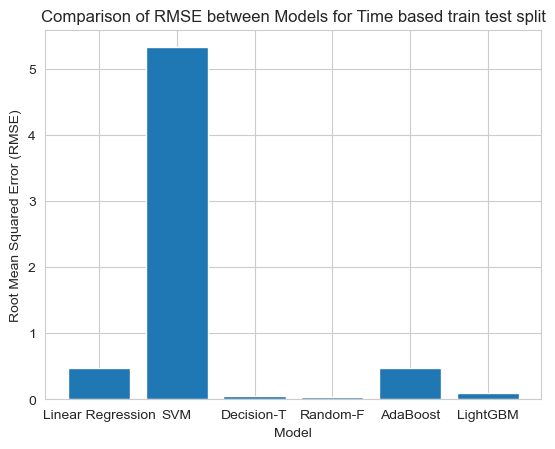

In [122]:
# Comparison of RMSE of diff models
import matplotlib.pyplot as plt

# Define the error metrics for each model
rmse_values = [rmse_time_lr, rmse_time_svm, rmse_time_dt, rmse_time_rfc, rmse_time_ab, rmse_time_l]

# Define the model names
model_names = ['Linear Regression', 'SVM', 'Decision-T', 'Random-F', 'AdaBoost', 'LightGBM']

# Create a bar plot
plt.bar(model_names, rmse_values)
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE between Models for Time based train test split')
plt.show()

In [123]:
# Comparisional analysis between Normal Train test split accuracy and Time based train test split accuracy

NORMAL TRAIN TEST SPLIT ACCURACY CHECKING FOR DIFFERENT MODELS (taking all errors together)

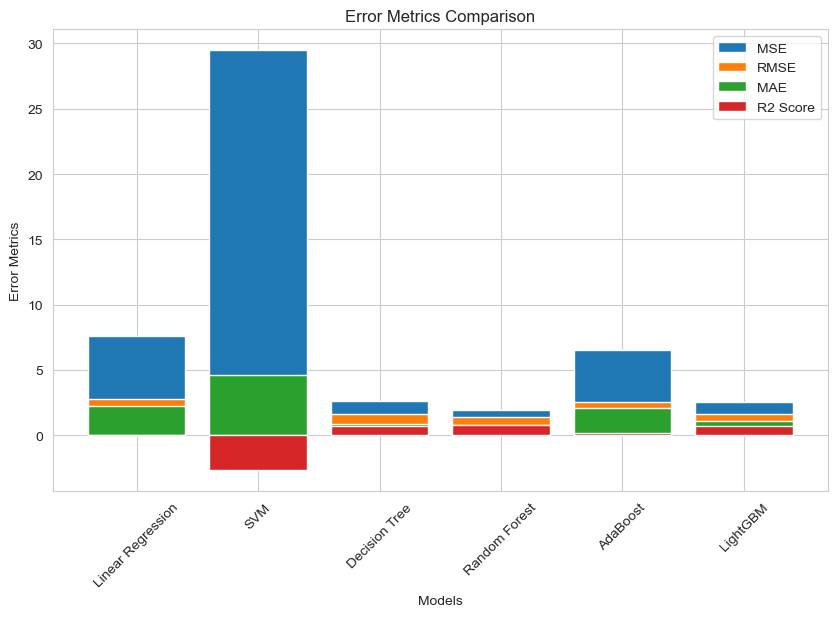

In [124]:
import matplotlib.pyplot as plt

# Define the models and their corresponding error metrics
models = ['Linear Regression','SVM', 'Decision Tree', 'Random Forest', 'AdaBoost', 'LightGBM']
mse = [mse_linear, mse_svm, mse_dt, mse_rfc, mse_ab, mse_lgbm]
rmse = [rmse_linear, rmse_svm, rmse_dt, rmse_rfc, rmse_ab, rmse_lgbm]
mae = [mae_linear, mae_svm, mae_dt, mae_rfc, mae_ab, mae_lgbm]
r2 = [r2_linear, r2_svm, r2_dt, r2_rfc, r2_ab, r2_lgbm]

# Plot the error metrics for each model
plt.figure(figsize=(10, 6))
plt.bar(models, mse, label='MSE')
plt.bar(models, rmse, label='RMSE')
plt.bar(models, mae, label='MAE')
plt.bar(models, r2, label='R2 Score')
plt.xlabel('Models')
plt.ylabel('Error Metrics')
plt.title('Error Metrics Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()


TIME BASED TRAIN TEST SPLIT ACCURACY CHECKING FOR DIFFERENT MODELS (Taking all errors together)

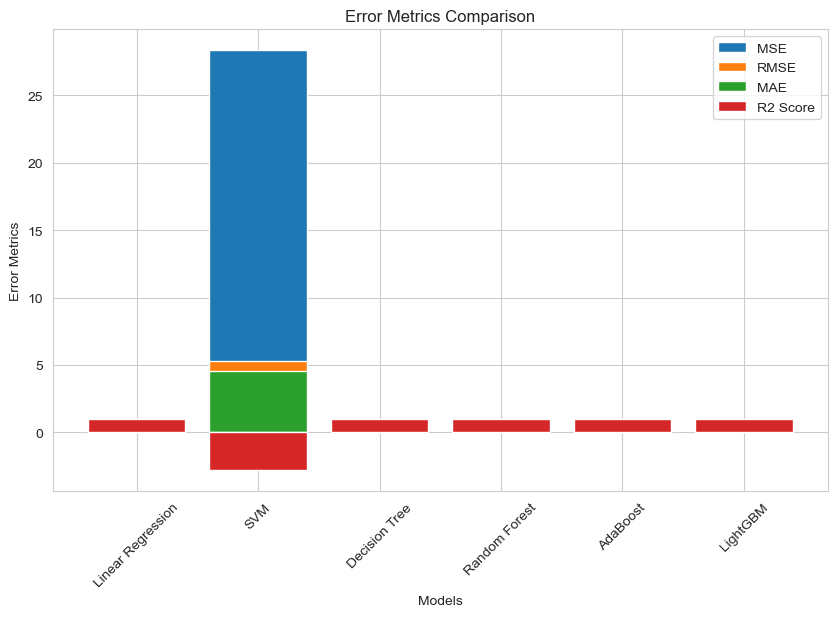

In [125]:
import matplotlib.pyplot as plt

# Define the models and their corresponding error metrics
models = ['Linear Regression','SVM', 'Decision Tree', 'Random Forest', 'AdaBoost', 'LightGBM']

mse = [mse_time_lr, mse_time_svm, mse_time_dt, mse_time_rfc, mse_time_ab, mse_time_l]
rmse = [rmse_time_lr, rmse_time_svm, rmse_time_dt, rmse_time_rfc, rmse_time_ab, rmse_time_l]
mae = [mae_time_lr, mae_time_svm, mae_time_dt, mae_time_rfc, mae_time_ab, mae_time_l ]
r2 = [r2_time_lr, r2_time_svm, r2_time_dt, r2_time_rfc, r2_time_ab, r2_time_l ]

# Plot the error metrics for each model
plt.figure(figsize=(10, 6))
plt.bar(models, mse, label='MSE')
plt.bar(models, rmse, label='RMSE')
plt.bar(models, mae, label='MAE')
plt.bar(models, r2, label='R2 Score')
plt.xlabel('Models')
plt.ylabel('Error Metrics')
plt.title('Error Metrics Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### 5. Select the best possible model


FROM THE TRAINING AND TESTING R2 SCORE CHECKING, AND BARPLOT VISUALIZATION OF DIFFERENT MODELS, WE GOT THESE FOLLOWING MAIN COMPARISIONAL DATA -
NOrmal Train Test Split:

1. In case of Normal train test split, LinearRegression, SVM are performing totally bad.
2. In the case of SVM, where the accuracy is negative, it suggests that the model is not able to capture the patterns in the data and is performing poorly.
3. Decision Tree, and Random Forest are showing overfitting as huge difference between training and testing also the training data accuracy is very high over testing. So model is unable to collect patterns and to predict output based on unseen data.
4. AdaBoost can be considered performing slightly better than other models but very low accuracy level 15.78% So it can't be taken.
5. LightGBM is showing better performance rather than all the other 5 models, testing accuracy = 67.87%. So we can take it.

Time Based Train Test Split:

1. In the case of SVM, where the accuracy is negative, it suggests that the model is not able to capture the patterns in the data. So it can't be considered.
2. All models excluding SVM are performing well as their training and testing accuracy is more closer as well as the accuracy score is also high above 95%. 
3. Also I checked for overfitting, no overfitting is there in case of time based analysis.
4. Based on the accuracy score, Random Forest, Decision Tree, LightGBM are performing more betterto capture computational patterns and can predict better outcome in future for our project.
5. By the way, all models including Linear Regression and AdaBoost also performing well.

# So based on the two kinds of train test split value testing accuracy , I will use Random Forest for hyperparameter tuning.

### 6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms


In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [42]
}

# Create the Random Forest Regressor model
model_hyper_rfc = RandomForestRegressor(n_jobs = -1)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator = model_hyper_rfc,
    param_distributions = param_grid,
    scoring='r2',
    n_iter= 3,
    cv= 3,
    verbose=1,
    random_state=42
)

# Perform the random search for hyperparameter tuning
random_search.fit(x_train_time, y_train_time)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Train the best model on the full training set
best_model.fit(x_train_time, y_train_time)

# Make predictions on the test set using the best model
y_pred_time = best_model.predict(x_test_time)

# Calculate the evaluation metrics for the best model
mse_hyper_rfc = mean_squared_error(y_test_time, y_pred_time)
rmse_hyper_rfc = np.sqrt(mse_hyper_rfc)
mae_hyper_rfc = mean_absolute_error(y_test_time, y_pred_time)
r2_hyper_rfc = r2_score(y_test_time, y_pred_time)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("MSE:", mse_hyper_rfc)
print("RMSE:", rmse_hyper_rfc)
print("MAE:", mae_hyper_rfc)
print("R2 score:", r2_hyper_rfc)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

Best Parameters: {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
MSE: 0.0010291930614371655
RMSE: 0.032081038970662494
MAE: 0.0017612331121665836
R2 score: 0.9998613299134784


### 7. Come up with the best possible model accuracy.

The hyperparameter tuning is taking very huge time. Best Model Accuracy is coming 99.99%. It can be predicted.

# THANK YOU!!!